# HW 4

# 1


The SD focuses on the spread of the data points within a single sample, showing how much variation exists within the original dataset.

The SEM shows how precisely the sample mean estimates the true population mean. It reflects how much the sample mean would fluctuate if you repeatedly took different samples from the population.

https://chatgpt.com/share/66ff3861-aad4-8012-b0d8-b5c45cc6f55d

# 6

__What is process of bootstrapping?__

Bootstrapping is like we use same data again when not have enough data. If we have small sample from population but want know about whole population, we can do bootstrapping. We take our sample and pick data randomly many times with replacement to make new samples. Some data points maybe pick more than once, others maybe not pick.

__What is main purpose of bootstrapping?__

Main purpose of bootstrapping is to estimate how accurate our sample statistic is, like average. It help us understand how much our results might change if we could collect many samples. It is useful when we cannot get more data, so we simulate it using what we have.

__How use bootstrapping to check if hypothesized average is reasonable?__

Suppose we think average height is 170 cm in population, but our sample is small and has different average. We can use bootstrapping to make many new samples and calculate their averages. Then we look at distribution of these averages.

If 170 cm is inside this distribution, then our guess might be reasonable. But if 170 cm is far from most of bootstrapped averages, then maybe our guess not so good.

# 8

1. Problem Introduction
  The goal of this analysis is to determine if a vaccine developed by AliTech improves the health of patients.
  
    ·An explaination of the meaning of a Null Hypothesis of "no effect" in this context
        The null hypothesis in this case states that, on average, the vaccine does not improve health scores.
        
    ·Data Visualization (motivating and illustrating the comparison of interest)

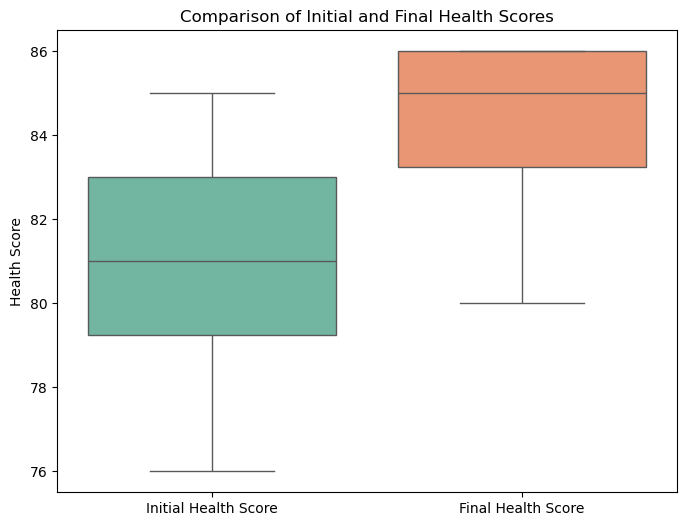

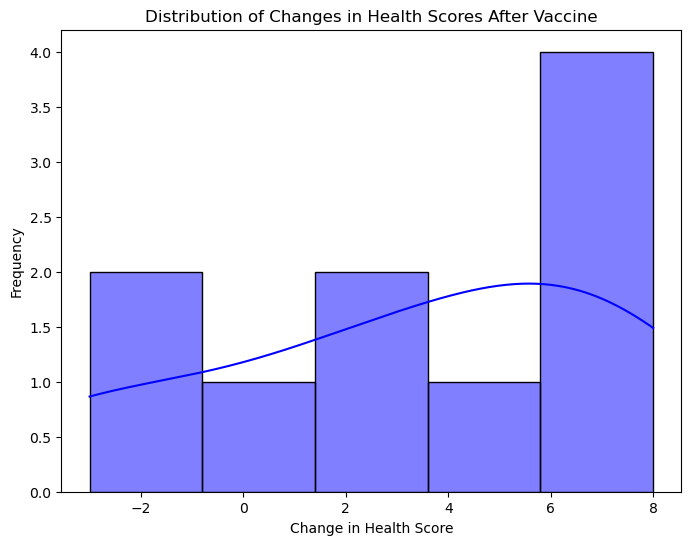

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate change in health score
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Visualization 1: Boxplot of Initial vs. Final Health Scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], palette="Set2")
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.show()

# Visualization 2: Histogram of Health Score Changes
plt.figure(figsize=(8, 6))
sns.histplot(df['HealthScoreChange'], bins=5, kde=True, color='blue')
plt.title('Distribution of Changes in Health Scores After Vaccine')
plt.xlabel('Change in Health Score')
plt.ylabel('Frequency')
plt.show()


2. Quantitative Analysis

  quantify whether the observed changes in health scores are statistically significant. We will use bootstrapping to estimate the variability of the mean change in health scores.

In [2]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Bootstrapping process
def bootstrap(data, num_samples=10000):
    boot_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.array(boot_means)

# Bootstrapping on health score changes
boot_means = bootstrap(df['HealthScoreChange'].values)

# Calculate 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(f"95% Confidence Interval for the mean change in health score: ({lower_bound}, {upper_bound})")


95% Confidence Interval for the mean change in health score: (0.9, 5.6)


3. Findings and Discussion

  After running the bootstrapping analysis, we’ll obtain the 95% confidence interval for the mean change in health scores. If this interval includes zero, we cannot conclude that the vaccine has a significant effect. If the interval does not include zero, we can reject the null hypothesis, suggesting the vaccine is effective.
 
    ·Conclusion regarding a Null Hypothesis of "no effect"
    
   If the 95% confidence interval for the change in health scores does not contain zero, we can conclude that the vaccine has astatistically significant effect on improving health scores. Otherwise, we fail to reject the null hypothesis and cannot claim the vaccine is effective.
        


    